In [274]:
### import the data and assess contents
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("data/IEAMonthlyData.csv")

In [275]:
df.head()

,COUNTRY,CODE_TIME,TIME,YEAR,MONTH,MONTH_NAME,PRODUCT,VALUE,DISPLAY_ORDER,yearToDate,previousYearToDate,share
0,Australia,JAN2010,January 2010,2010,1,January,Hydro,990.728,1,16471.891,NaN,0.047771
1,Australia,JAN2010,January 2010,2010,1,January,Wind,409.469,2,4940.909,NaN,0.019744
2,Australia,JAN2010,January 2010,2010,1,January,Solar,49.216,3,908.238,NaN,0.002373
3,Australia,JAN2010,January 2010,2010,1,January,Geothermal,0.083,4,0.996,NaN,0.000004
4,Australia,JAN2010,January 2010,2010,1,January,Total combustible fuels,19289.730,7,214302.969,NaN,0.930108


In [276]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181915 entries, 0 to 181914
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   COUNTRY             181915 non-null  object 
 1   CODE_TIME           181915 non-null  object 
 2   TIME                181915 non-null  object 
 3   YEAR                181915 non-null  int64  
 4   MONTH               181915 non-null  int64  
 5   MONTH_NAME          181915 non-null  object 
 6   PRODUCT             181915 non-null  object 
 7   VALUE               181915 non-null  float64
 8   DISPLAY_ORDER       181915 non-null  int64  
 9   yearToDate          181915 non-null  float64
 10  previousYearToDate  164810 non-null  float64
 11  share               181915 non-null  float64
dtypes: float64(4), int64(3), object(5)
memory usage: 16.7+ MB


In [277]:
### data looks to be in an okay data type format

In [278]:
df.describe()

,YEAR,MONTH,VALUE,DISPLAY_ORDER,yearToDate,previousYearToDate,share
count,181915.000000,181915.000000,1.819150e+05,181915.000000,1.819150e+05,1.648100e+05,181915.000000
mean,2016.456818,6.498145,2.091292e+04,14.418410,2.509544e+05,1.382083e+05,0.289057
std,3.657532,3.452288,8.584724e+04,7.819235,1.026864e+06,6.383465e+05,0.427347
min,2010.000000,1.000000,-6.852344e+03,1.000000,-6.667000e+04,-6.667000e+04,-4.649269
25%,2013.000000,3.000000,6.685189e+01,8.000000,8.831870e+02,3.988967e+02,0.009907
50%,2017.000000,6.000000,7.663990e+02,15.000000,9.558855e+03,4.356565e+03,0.082530
75%,2020.000000,9.000000,4.989495e+03,21.000000,5.927517e+04,3.025087e+04,0.511302
max,2022.000000,12.000000,1.001529e+06,27.000000,1.082156e+07,1.082156e+07,5.649269


In [279]:
### no obvious anomalies from .describe()

In [280]:
df.PRODUCT.unique()

array(['Hydro', 'Wind', 'Solar', 'Geothermal', 'Total combustible fuels',
       'Coal', 'Oil', 'Natural gas', 'Combustible renewables',
       'Net electricity production', 'Electricity supplied',
       'Used for pumped storage', 'Distribution losses',
       'Final consumption', 'Renewables', 'Non-renewables', 'Others',
       'Other renewables aggregated', 'Low carbon', 'Fossil fuels',
       'Other combustible non-renewables', 'Not specified',
       'Total imports', 'Total exports', 'Electricity trade', 'Nuclear',
       'Other renewables'], dtype=object)

In [281]:
### making dataframe where filtering the data using mask PRODUCT = Nuclear

df_Nuclear = df.copy()

df_Nuclear = df_Nuclear[df_Nuclear['PRODUCT'] == 'Nuclear']

df_Nuclear

,COUNTRY,CODE_TIME,TIME,YEAR,MONTH,MONTH_NAME,PRODUCT,VALUE,DISPLAY_ORDER,yearToDate,previousYearToDate,share
48,Belgium,JAN2010,January 2010,2010,1,January,Nuclear,3788.629000,6,45729.000000,NaN,0.454233
74,Canada,JAN2010,January 2010,2010,1,January,Nuclear,7704.885000,6,85527.000000,NaN,0.127709
119,Czech Republic,JAN2010,January 2010,2010,1,January,Nuclear,2673.869000,6,26346.003000,NaN,0.344221
186,Finland,JAN2010,January 2010,2010,1,January,Nuclear,2022.462000,6,21889.000000,NaN,0.243625
211,France,JAN2010,January 2010,2010,1,January,Nuclear,40313.099000,6,407878.001000,NaN,0.722318
...,...,...,...,...,...,...,...,...,...,...,...,...
181795,Spain,DEC2022,December 2022,2022,12,December,Nuclear,5161.300646,6,55983.635219,54040.201585,0.227521
181820,Sweden,DEC2022,December 2022,2022,12,December,Nuclear,3992.981207,6,50062.764373,50991.809511,0.255362
181844,Switzerland,DEC2022,December 2022,2022,12,December,Nuclear,2221.459321,6,23338.449675,18350.201817,0.420357
181868,United Kingdom,DEC2022,December 2022,2022,12,December,Nuclear,4006.274965,6,43381.479736,41661.544914,0.142178


In [282]:
### sorting the countries by COUNTRY, A to Z

df_Nuclear.sort_values('COUNTRY', inplace = True)

In [283]:
df_Nuclear

,COUNTRY,CODE_TIME,TIME,YEAR,MONTH,MONTH_NAME,PRODUCT,VALUE,DISPLAY_ORDER,yearToDate,previousYearToDate,share
68001,Argentina,SEP2015,September 2015,2015,9,September,Nuclear,383.907000,6,6644.077000,NaN,0.034735
138892,Argentina,APR2020,April 2020,2020,4,April,Nuclear,980.579263,6,10064.414559,1677.306705,0.102673
172695,Argentina,MAY2022,May 2022,2022,5,May,Nuclear,632.707284,6,7509.186670,3181.082115,0.053722
105844,Argentina,APR2018,April 2018,2018,4,April,Nuclear,580.602054,6,6514.307078,2042.287000,0.051019
140269,Argentina,MAY2020,May 2020,2020,5,May,Nuclear,1019.192950,6,10064.414559,2518.493617,0.098556
...,...,...,...,...,...,...,...,...,...,...,...,...
154051,United States,FEB2021,February 2021,2021,2,February,Nuclear,62948.249926,6,778495.971713,140141.222447,0.188466
15422,United States,APR2011,April 2011,2011,4,April,Nuclear,54545.886000,6,790204.001000,260060.409000,0.178693
87233,United States,DEC2016,December 2016,2016,12,December,Nuclear,71697.943000,6,805693.999000,797177.999000,0.205303
65555,United States,JUN2015,June 2015,2015,6,June,Nuclear,68516.176000,6,797177.999000,385188.291000,0.187443


In [284]:
### making dataframe for Nuclear PRODUCT from United Kingdom

df_Nuclear_UK = df.copy()

df_Nuclear_UK = df_Nuclear_UK[(df_Nuclear_UK['PRODUCT'] == 'Nuclear') & (df_Nuclear_UK['COUNTRY'] == 'United Kingdom')]

df_Nuclear_UK

,COUNTRY,CODE_TIME,TIME,YEAR,MONTH,MONTH_NAME,PRODUCT,VALUE,DISPLAY_ORDER,yearToDate,previousYearToDate,share
918,United Kingdom,JAN2010,January 2010,2010,1,January,Nuclear,5769.435000,6,56442.001000,NaN,0.153812
1884,United Kingdom,FEB2010,February 2010,2010,2,February,Nuclear,4990.206000,6,56442.001000,NaN,0.151625
2849,United Kingdom,MAR2010,March 2010,2010,3,March,Nuclear,5762.634000,6,56442.001000,NaN,0.170583
3815,United Kingdom,APR2010,April 2010,2010,4,April,Nuclear,4662.145000,6,56442.001000,NaN,0.161856
4781,United Kingdom,MAY2010,May 2010,2010,5,May,Nuclear,4031.987000,6,56442.001000,NaN,0.143650
...,...,...,...,...,...,...,...,...,...,...,...,...
177264,United Kingdom,AUG2022,August 2022,2022,8,August,Nuclear,3246.172585,6,43381.479736,27143.498957,0.130952
178419,United Kingdom,SEP2022,September 2022,2022,9,September,Nuclear,3189.427615,6,43381.479736,30467.886582,0.123800
179572,United Kingdom,OCT2022,October 2022,2022,10,October,Nuclear,3237.665844,6,43381.479736,33668.774667,0.120188
180718,United Kingdom,NOV2022,November 2022,2022,11,November,Nuclear,3120.873286,6,43381.479736,37567.960152,0.113512


In [285]:
### sorting the values with respect to year, then month

df_Nuclear_UK.sort_values(['YEAR','MONTH'], inplace=True)
df_Nuclear_UK

,COUNTRY,CODE_TIME,TIME,YEAR,MONTH,MONTH_NAME,PRODUCT,VALUE,DISPLAY_ORDER,yearToDate,previousYearToDate,share
918,United Kingdom,JAN2010,January 2010,2010,1,January,Nuclear,5769.435000,6,56442.001000,NaN,0.153812
1884,United Kingdom,FEB2010,February 2010,2010,2,February,Nuclear,4990.206000,6,56442.001000,NaN,0.151625
2849,United Kingdom,MAR2010,March 2010,2010,3,March,Nuclear,5762.634000,6,56442.001000,NaN,0.170583
3815,United Kingdom,APR2010,April 2010,2010,4,April,Nuclear,4662.145000,6,56442.001000,NaN,0.161856
4781,United Kingdom,MAY2010,May 2010,2010,5,May,Nuclear,4031.987000,6,56442.001000,NaN,0.143650
...,...,...,...,...,...,...,...,...,...,...,...,...
177264,United Kingdom,AUG2022,August 2022,2022,8,August,Nuclear,3246.172585,6,43381.479736,27143.498957,0.130952
178419,United Kingdom,SEP2022,September 2022,2022,9,September,Nuclear,3189.427615,6,43381.479736,30467.886582,0.123800
179572,United Kingdom,OCT2022,October 2022,2022,10,October,Nuclear,3237.665844,6,43381.479736,33668.774667,0.120188
180718,United Kingdom,NOV2022,November 2022,2022,11,November,Nuclear,3120.873286,6,43381.479736,37567.960152,0.113512


In [286]:
df_Nuclear_UK.describe()

,YEAR,MONTH,VALUE,DISPLAY_ORDER,yearToDate,previousYearToDate,share
count,156.000000,156.00000,156.000000,156.0,156.000000,144.000000,156.000000
mean,2016.000000,6.50000,4736.239729,6.0,56834.876742,31628.060872,0.175445
std,3.753708,3.46317,854.930201,0.0,8265.528795,17199.265512,0.031030
min,2010.000000,1.00000,2976.988918,6.0,41661.544914,4136.984600,0.113512
25%,2013.000000,3.75000,4068.893620,6.0,51032.090000,16586.803500,0.151571
50%,2016.000000,6.50000,4922.233913,6.0,59097.749999,30769.374500,0.172632
75%,2019.000000,9.25000,5409.722252,6.0,63894.555000,45723.220961,0.199084
max,2022.000000,12.00000,6293.556000,6.0,65149.085000,65149.085000,0.251536


In [287]:
### finding the months where UK Nuclear production was over the UK Nuclear mean production

months_UKNuc_abvmean = df_Nuclear_UK[df_Nuclear_UK['VALUE'] > df_Nuclear_UK['VALUE'].mean()]
months_UKNuc_abvmean

,COUNTRY,CODE_TIME,TIME,YEAR,MONTH,MONTH_NAME,PRODUCT,VALUE,DISPLAY_ORDER,yearToDate,previousYearToDate,share
918,United Kingdom,JAN2010,January 2010,2010,1,January,Nuclear,5769.435000,6,56442.001000,NaN,0.153812
1884,United Kingdom,FEB2010,February 2010,2010,2,February,Nuclear,4990.206000,6,56442.001000,NaN,0.151625
2849,United Kingdom,MAR2010,March 2010,2010,3,March,Nuclear,5762.634000,6,56442.001000,NaN,0.170583
9604,United Kingdom,OCT2010,October 2010,2010,10,October,Nuclear,5291.278000,6,56442.001000,NaN,0.172718
11535,United Kingdom,DEC2010,December 2010,2010,12,December,Nuclear,5705.994000,6,56442.001000,NaN,0.155130
...,...,...,...,...,...,...,...,...,...,...,...,...
112675,United Kingdom,AUG2018,August 2018,2018,8,August,Nuclear,5431.692008,6,59097.749999,43296.213000,0.229755
114052,United Kingdom,SEP2018,September 2018,2018,9,September,Nuclear,5065.140967,6,59097.749999,48729.221000,0.210666
118183,United Kingdom,DEC2018,December 2018,2018,12,December,Nuclear,4762.848248,6,59097.749999,63886.861000,0.166318
131953,United Kingdom,OCT2019,October 2019,2019,10,October,Nuclear,4804.235959,6,51032.090000,50050.641711,0.177822


In [288]:
print(len(months_UKNuc_abvmean))
print(len(df_Nuclear_UK))

print(f'\n{round(100 * len(months_UKNuc_abvmean)/len(df_Nuclear_UK),1)}% of months above mean just for UK Nuclear production')

89
156

57.1% of months above mean just for UK Nuclear production


In [289]:
### finding the World Nuclear mean production

world_Nuc_mean = df_Nuclear['VALUE'].mean()
world_Nuc_mean

18536.523332618926

In [290]:
### finding the months where UK Nuclear production was over the World Nuclear mean production

months_UKNuc_abvwrldmean = df_Nuclear_UK[df_Nuclear_UK['VALUE'] > world_Nuc_mean]
months_UKNuc_abvwrldmean

,COUNTRY,CODE_TIME,TIME,YEAR,MONTH,MONTH_NAME,PRODUCT,VALUE,DISPLAY_ORDER,yearToDate,previousYearToDate,share


In [291]:
print(len(months_UKNuc_abvwrldmean))
print(len(df_Nuclear))

print(f'\n{round(100 * len(months_UKNuc_abvwrldmean)/len(df_Nuclear),2)}% of months UK was above World mean for Nuclear production')

0
5327

0.0% of months UK was above World mean for Nuclear production


In [292]:
### finding the months where UK Nuclear production was over French Nuclear mean production

france_Nuc_mean = df_Nuclear[df_Nuclear['COUNTRY'] == 'France']['VALUE'].mean()

months_UKNuc_abvfrancemean = df_Nuclear_UK[df_Nuclear_UK['VALUE'] > france_Nuc_mean]
months_UKNuc_abvfrancemean

,COUNTRY,CODE_TIME,TIME,YEAR,MONTH,MONTH_NAME,PRODUCT,VALUE,DISPLAY_ORDER,yearToDate,previousYearToDate,share


In [293]:
print(len(months_UKNuc_abvfrancemean))
print(len(df_Nuclear))

print(f'\n{round(100 * len(months_UKNuc_abvfrancemean)/len(df_Nuclear),2)}% of months UK was above France mean for Nuclear production')

0
5327

0.0% of months UK was above France mean for Nuclear production


In [294]:
### difference between UK max and France / World means

UKNucmax = df_Nuclear_UK['VALUE'].max()

diff_UKNucmax_wrldmean = world_Nuc_mean - UKNucmax
diff_UKNucmax_francemean = france_Nuc_mean - UKNucmax

print(f'\n{round(diff_UKNucmax_wrldmean,2)} - difference between UK max Nuclear production and World mean Nuclear production')
print(f'\n{round(diff_UKNucmax_francemean,2)} - difference between UK max Nuclear production and France mean Nuclear production')


12242.97 - difference between UK max Nuclear production and World mean Nuclear production

25635.72 - difference between UK max Nuclear production and France mean Nuclear production


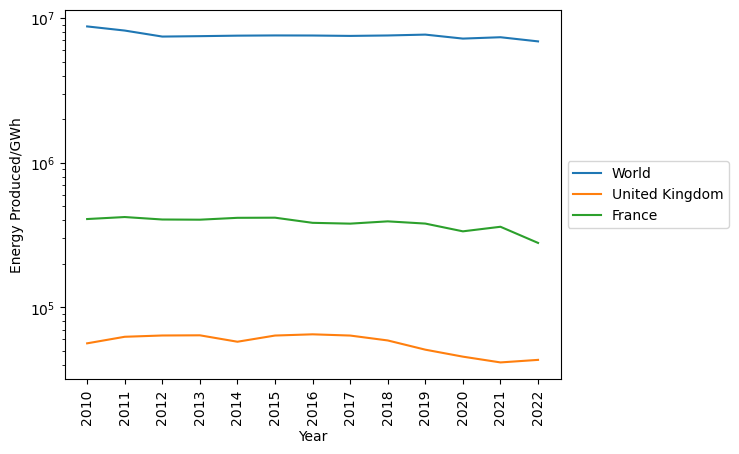

In [324]:
### plotting UK Nuclear production against that of France and the World on a yearly basis
df_Nuclear_France = df.copy()
df_Nuclear_France = df_Nuclear_France[(df_Nuclear_France['PRODUCT'] == 'Nuclear') & (df_Nuclear_France['COUNTRY'] == 'France')]
df_Nuclear_France.sort_values(['YEAR','MONTH'], inplace=True)

df_Nuclear_year = df_Nuclear.groupby('YEAR')['VALUE'].sum().to_frame().reset_index()
df_Nuclear_UK_year = df_Nuclear_UK.groupby('YEAR')['VALUE'].sum().to_frame().reset_index()
df_Nuclear_France_year = df_Nuclear_France.groupby('YEAR')['VALUE'].sum().to_frame().reset_index()

df_Nuclear_year['COUNTRY'] = 'World'
df_Nuclear_UK_year['COUNTRY'] = 'United Kingdom'
df_Nuclear_France_year['COUNTRY'] = 'France'

Yearly_Nuclear_Production = pd.concat([df_Nuclear_year, df_Nuclear_UK_year, df_Nuclear_France_year])

fig = sns.lineplot(data=Yearly_Nuclear_Production, y='VALUE', x='YEAR', hue='COUNTRY')
plt.yscale('log')
plt.xlabel('Year')
plt.ylabel('Energy Produced (GWh)')
plt.xticks(rotation=90)
fig.set_xticks(range(2010, 2023), labels=range(2010, 2023))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title('Nuclear Energy Production')
plt.savefig('Nuclear Energy Production - World, UK, Fra');

Text(0.5, 1.0, 'France Energy Production 2018-2022')

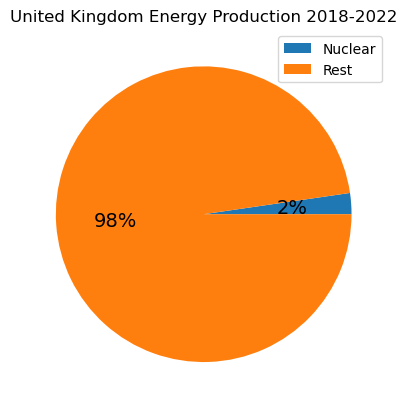

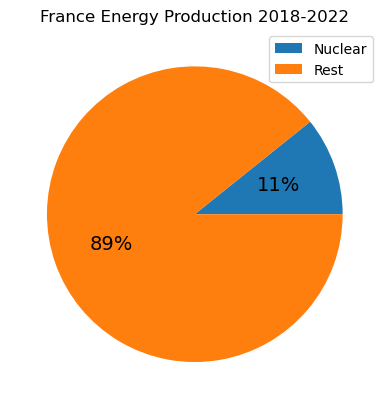

In [506]:
### plotting UK Nuclear production as percentage of total UK production and same for France, over last five years

df_UK_5years = df.copy()
df_UK_5years = df_UK_5years[(df_UK_5years['YEAR'] > 2017) & (df_UK_5years['COUNTRY'] == 'United Kingdom')]
df_France_5years = df.copy()
df_France_5years = df_France_5years[(df_France_5years['YEAR'] > 2017) & (df_France_5years['COUNTRY'] == 'France')]

df_Nuclear_France_5yrs = df_Nuclear_France[df_Nuclear_France['YEAR'] > 2017]
df_Nuclear_UK_5yrs = df_Nuclear_UK[df_Nuclear_UK['YEAR'] > 2017]

UK_5years = df_UK_5years['VALUE'].sum()
Nuclear_UK_5yrs = df_Nuclear_UK_5yrs['VALUE'].sum()
France_5years = df_France_5years['VALUE'].sum()
Nuclear_France_5yrs = df_Nuclear_France_5yrs['VALUE'].sum()

UK_Nuclear_Production = pd.DataFrame({'PRODUCT':['Nuclear', 'Rest'], 'VALUE':[Nuclear_UK_5yrs, UK_5years-Nuclear_UK_5yrs]}).set_index('PRODUCT')
France_Nuclear_Production = pd.DataFrame({'PRODUCT':['Nuclear', 'Rest'], 'VALUE':[Nuclear_France_5yrs, France_5years-Nuclear_France_5yrs]}).set_index('PRODUCT')

#function to put percentage values in label
def label_function(val):
    return f'{val:.0f}%'

fig = UK_Nuclear_Production.plot(kind='pie', y='VALUE', autopct=label_function, textprops={'fontsize': 14}, ylabel='', labels=None)
plt.title('United Kingdom Energy Production 2018-2022')
plt.savefig('United Kingdom perc. Nuc. Energy Production 2018-2022');

fig = France_Nuclear_Production.plot(kind='pie', y='VALUE', autopct=label_function, textprops={'fontsize': 14}, ylabel='', labels=None)
plt.title('France Energy Production 2018-2022')
plt.savefig('France perc. Nuc. Energy Production 2018-2022');